### モルフォロジー演算
- 以下の画像（wb.jpg）を使用する

<img src="fig/wb.jpg" width="50%">

- カーネルの作成: ```cv2.getStructuringElement()```を使用する
    - ```cv2.getStructuringElement(cv2.MORPH_RECT,(n, n))```: n × nの矩形（正方形）のカーネルの作成
    - ```cv2.getStructuringElement(cv2.MORPH_CROSS,(n, n))```: n × nの十字のカーネルの作成
    - ```cv2.MORPH_RECT```か```cv2.MORPH_CROSS```とnを指定すればよい

In [8]:
# カーネルの表示
import cv2

# 矩形カーネル
print('3×3 矩形カーネル')
print(cv2.getStructuringElement(cv2.MORPH_RECT,(3, 3)))
print('5×5 矩形カーネル')
print(cv2.getStructuringElement(cv2.MORPH_RECT,(5, 5)))
print('7×7 矩形カーネル')
print(cv2.getStructuringElement(cv2.MORPH_RECT,(7, 7)))

# 十字カーネル
print('3×3 十字カーネル')
print(cv2.getStructuringElement(cv2.MORPH_CROSS,(3, 3)))
print('5×5 十字カーネル')
print(cv2.getStructuringElement(cv2.MORPH_CROSS,(5, 5)))
print('7×7 十字カーネル')
print(cv2.getStructuringElement(cv2.MORPH_CROSS,(7, 7)))

# フィルタリング対象領域を1で表示する

3×3 矩形カーネル
[[1 1 1]
 [1 1 1]
 [1 1 1]]
5×5 矩形カーネル
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
7×7 矩形カーネル
[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]
3×3 十字カーネル
[[0 1 0]
 [1 1 1]
 [0 1 0]]
5×5 十字カーネル
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]
7×7 十字カーネル
[[0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [1 1 1 1 1 1 1]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]]


### 収縮処理
- 2値化での黒の領域を増やす（白の領域を減らす）
- カーネル領域に1つでも黒の画素があれば，アンカーの画素値を黒にする
- 収縮処理の回数を増やすと，画像が黒色になる
- ```cv2.erode()```を使用する

```python
収縮処理画像変数 = cv2.erode(入力画像変数, カーネル変数, iterations=繰り返し数)
```

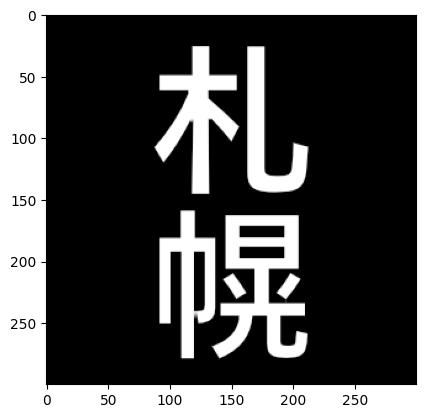

In [9]:
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread('wb.jpg')

# BGR → GRAY
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# カーネルの作成
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3, 3))

# 収縮処理（1回）
after_image = cv2.erode(image, kernel, iterations=1)

plt.imshow(after_image)
plt.gray()
plt.show()

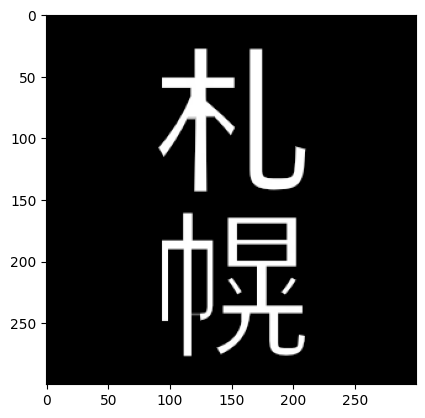

In [10]:
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread('wb.jpg')

# BGR → GRAY
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# カーネルの作成
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3, 3))

# 収縮処理（3回）
after_image = cv2.erode(image, kernel, iterations=3)

plt.imshow(after_image)
plt.gray()
plt.show()

### 膨張処理
- 2値化での白の領域を増やす（黒の領域を減らす）
- カーネル領域に1つでも白の画素があれば，アンカーの画素値を白にする
- 収縮処理の回数を増やすと，画像が白色になる
- ```cv2.dilate()```を使用する

```python
膨張処理画像変数 = cv2.dilate(入力画像変数, カーネル変数, iterations=繰り返し数)
```

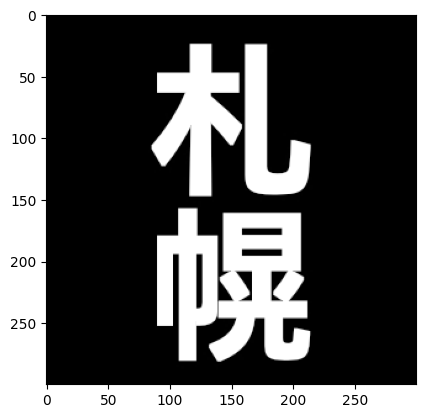

In [50]:
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread('wb.jpg')

# BGR → GRAY
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# カーネルの作成
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3, 3))

# 膨張処理（1回）
after_image = cv2.dilate(image, kernel, iterations=1)

plt.imshow(after_image)
plt.gray()
plt.show()

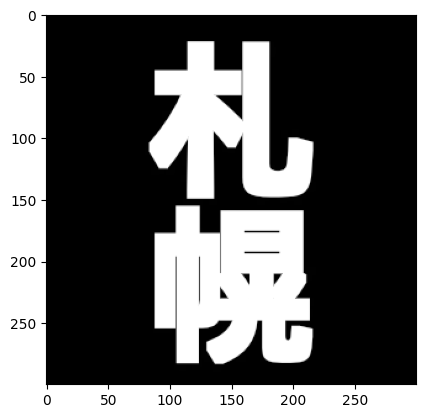

In [51]:
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread('wb.jpg')

# BGR → GRAY
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# カーネルの作成
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3, 3))

# 膨張処理（3回）
after_image = cv2.dilate(image, kernel, iterations=3)

plt.imshow(after_image)
plt.gray()
plt.show()

### オープニング処理
- 収縮の後に膨張をする処理，白いノイズを消す効果がある
- ```cv2.morphologyEx()```と```cv2.MORPH_OPEN```を使用する

```python
オープニング処理画像変数 = cv2.morphologyEx(入力画像変数, cv2.MORPH_OPEN, カーネル変数, iterations=繰り返し数)
```

- 使用画像(wb_white_noise.jpg)

<img src="fig/wb_white_noise.jpg" width="50%">

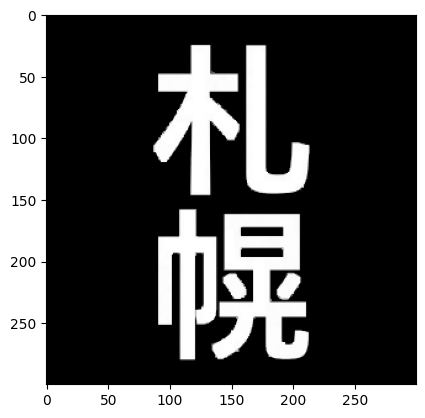

In [30]:
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread('wb_white_noise.jpg')

# BGR → GRAY
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# カーネルの作成
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3, 3))

# オープニング処理
after_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=2)

plt.imshow(after_image)
plt.gray()
plt.show()

### クロージング処理
- 膨張の後に収縮をする処理，黒いノイズを消す効果がある
- ```cv2.morphologyEx()```と```cv2.MORPH_CLOSE```を使用する
```python
クロージング処理画像変数 = cv2.morphologyEx(入力画像変数, cv2.MORPH_CLOSE, カーネル変数, iterations=繰り返し数)
```

- 使用画像(wb_black_noise.jpg)

<img src="fig/wb_black_noise.jpg" width="50%">

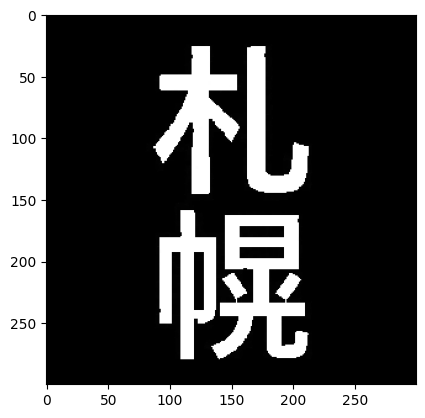

In [31]:
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread('wb_black_noise.jpg')

# BGR → GRAY
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# カーネルの作成
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3, 3))

# クロージング処理
after_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=1)

plt.imshow(after_image)
plt.gray()
plt.show()

### モルフォロジー勾配
- 膨張した画像と収縮した画像の差分をとる処理
- 結果として境界線を表示できる
- ```cv2.morphologyEx()```と```cv2.MORPH_GRADIENT```を使用する

```python
モルフォロジー勾配画像変数 = cv2.morphologyEx(入力画像変数, cv2.MORPH_GRADIENT, カーネル変数, iterations=繰り返し数)
```

- 使用画像(wb.jpg)

<img src="fig/wb.jpg" width="50%">

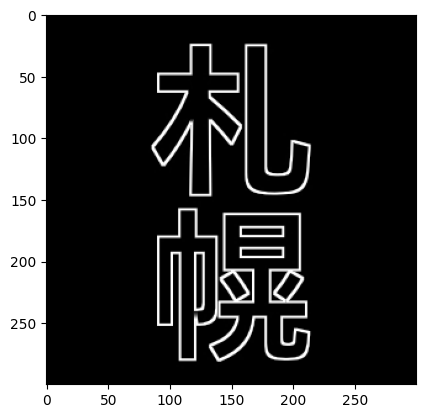

In [52]:
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread('wb.jpg')

# BGR → GRAY
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# カーネルの作成
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3, 3))

# モルフォロジー勾配
after_image = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel, iterations=1)

plt.imshow(after_image)
plt.gray()
plt.show()

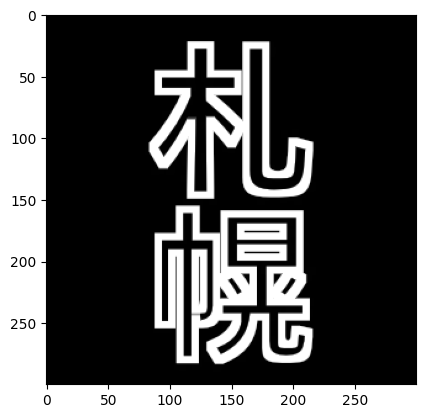

In [55]:
import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread('wb.jpg')

# BGR → GRAY
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# カーネルの作成
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3, 3))

# モルフォロジー勾配（3回）
after_image = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel, iterations=3)

plt.imshow(after_image)
plt.gray()
plt.show()

### 幾何学変換
- 画像のサイズは，```画像変数.shape```で確認できる
- ```print(画像変数.shape)```を行うと，(高さ，幅，チャンネル数)を確認できる
- RGB画像空間のチャンネル数は，RGBの3要素となる
- ```高さ変数, 幅変数, チャンネル変数 = 画像変数.shape```とすることで，それぞれの要素を各変数に保存できる

(800, 533, 3)
画像高さ: 800
画像幅: 533
画像チャンネル数: 3


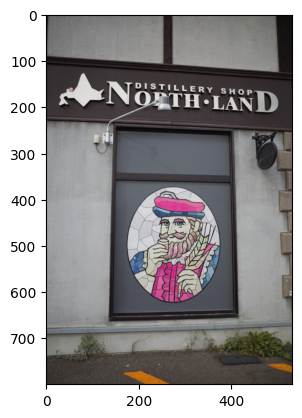

In [36]:
import cv2
import matplotlib.pyplot as plt

# RGBA画像の読み込み
image = cv2.imread('nikka.jpeg')

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 画像のサイズを表示
print(image.shape)

# 各値を変数に保存
height, width, channels = image.shape

print('画像高さ:', height)
print('画像幅:', width)
print('画像チャンネル数:', channels)

# 画像の表示
plt.imshow(image)
plt.show()

### 画像のトリミング
- 画像の一部分を取り出すことををトリミングとよぶ
- スライス記法（```[a:b, c:d, e:f]```）を使うことで，容易に行える
- 高さ範囲を ```a:b```，幅範囲を ```c:d```，チャンネル範囲を ```e:f``` で指定する
- 例:
    - ```画像変数[a:b, :, :]```
        - 高さ: aからb-1までを切り出す（```a:b```はaからbの手前まで使用するという意味）
        - 幅: ```:``` すべての要素を使用するという意味）
        - チャンネル: ```:``` すべての要素を使用するという意味）

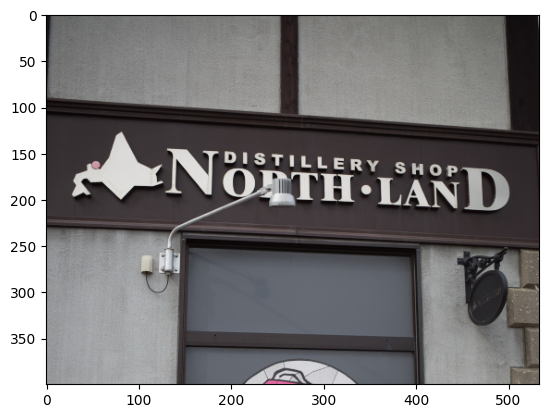

In [37]:
import cv2
import matplotlib.pyplot as plt

# RGBA画像の読み込み
image = cv2.imread('nikka.jpeg')

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# トリミング(上半分だけ切り出す)
image2 = image[0:height//2, :, :]

# 画像の表示
plt.imshow(image2)
plt.show()

### トリミング記法の応用
- ```a: ```を指定すると，aから最後まで取り出すことできる
- ``` :b```を指定すると，最初からbの手前まで取り出すことできる
    - このことから，```:```は，最初から最後までの意味になる
- ```::-1```を指定すると逆順で取り出す

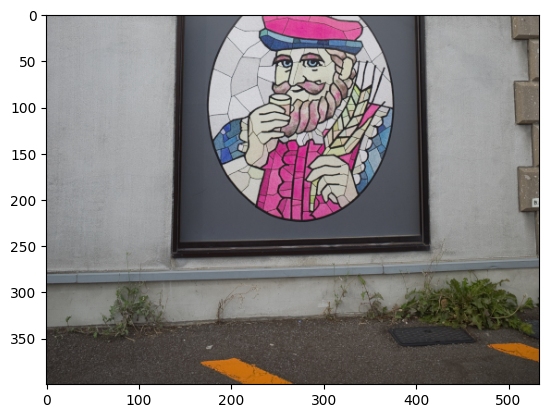

In [38]:
import cv2
import matplotlib.pyplot as plt

# RGBA画像の読み込み
image = cv2.imread('nikka.jpeg')

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# トリミング(下半分だけ切り出す)
image2 = image[height//2:, :, :]

# 画像の表示
plt.imshow(image2)
plt.show()

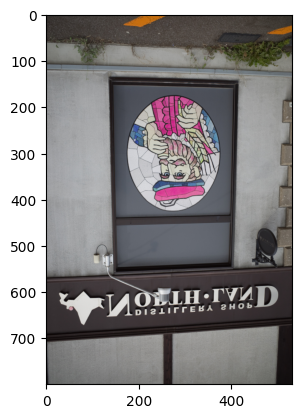

In [39]:
import cv2
import matplotlib.pyplot as plt

# RGBA画像の読み込み
image = cv2.imread('nikka.jpeg')

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# トリミング(高さを逆順にして取り出す，つまり上下反転になる)
image2 = image[::-1, :, :]

# 画像の表示
plt.imshow(image2)
plt.show()

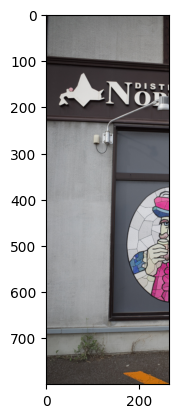

In [40]:
import cv2
import matplotlib.pyplot as plt

# RGBA画像の読み込み
image = cv2.imread('nikka.jpeg')

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# トリミング(左半分だけ切り出す)
image2 = image[:, 0:width//2, :]

# 画像の表示
plt.imshow(image2)
plt.show()

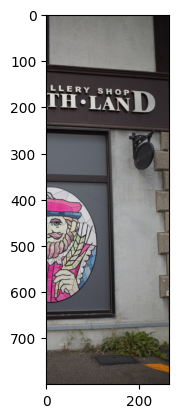

In [41]:
import cv2
import matplotlib.pyplot as plt

# RGBA画像の読み込み
image = cv2.imread('nikka.jpeg')

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# トリミング(右半分だけ切り出す)
image2 = image[:, width//2:, :]

# 画像の表示
plt.imshow(image2)
plt.show()

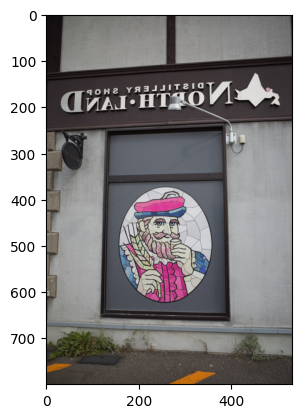

In [42]:
import cv2
import matplotlib.pyplot as plt

# RGBA画像の読み込み
image = cv2.imread('nikka.jpeg')

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# トリミング(幅を逆順にして取り出す，つまり左右反転)
image2 = image[:, ::-1, :]

# 画像の表示
plt.imshow(image2)
plt.show()

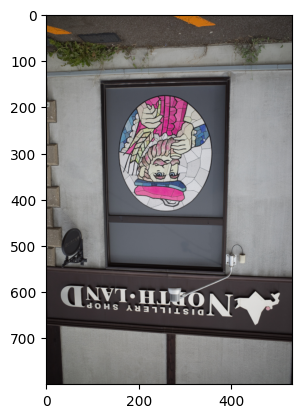

In [43]:
import cv2
import matplotlib.pyplot as plt

# RGBA画像の読み込み
image = cv2.imread('nikka.jpeg')

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# トリミング(高さ・幅を逆順にして取り出す，つまり上下左右反転)
image2 = image[::-1, ::-1, :]

# 画像の表示
plt.imshow(image2)
plt.show()

### 画像のリサイズ
- 画像のサイズ変更には```cv2.resize(画像変数, (変更後幅, 変更後高さ))```を使用する

(300, 500, 3)


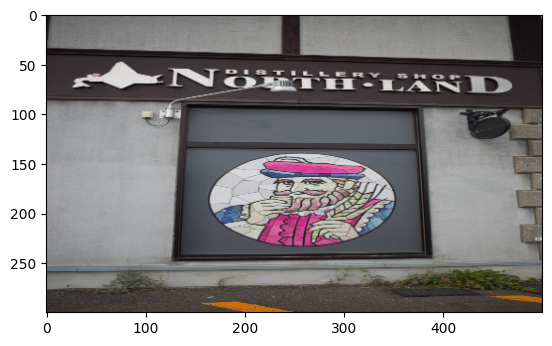

In [44]:
import cv2
import matplotlib.pyplot as plt

# RGBA画像の読み込み
image = cv2.imread('nikka.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 画像のリサイズ
after_image = cv2.resize(image, (500, 300))

# 画像の表示
print(after_image.shape)
plt.imshow(after_image)
plt.show()

(700, 100, 3)


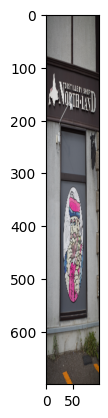

In [45]:
import cv2
import matplotlib.pyplot as plt

# RGBA画像の読み込み
image = cv2.imread('nikka.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 画像のリサイズ
after_image = cv2.resize(image, (100, 700))

# 画像の表示
print(after_image.shape)
plt.imshow(after_image)
plt.show()

### パーセント指定による画像のリサイズ
- パーセント指定による画像のサイズ変更には```cv2.resize(img, None, fx=横方向パーセント, fy=縦方向パーセント)```を使用する
- 拡大する場合，近似値で画素で計算する

(640, 266, 3)


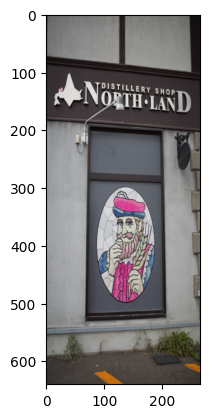

In [46]:
import cv2
import matplotlib.pyplot as plt

# RGBA画像の読み込み
image = cv2.imread('nikka.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 画像のリサイズ（横50%，縦80%）
after_image = cv2.resize(image, None, fx=0.5, fy=0.8)

# 画像の表示
print(after_image.shape)
plt.imshow(after_image)
plt.show()

(800, 533, 3)
(1600, 800, 3)


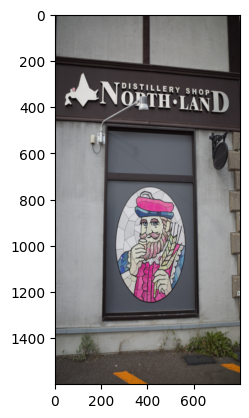

In [47]:
import cv2
import matplotlib.pyplot as plt

# RGBA画像の読み込み
image = cv2.imread('nikka.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 画像のリサイズ（横150%，縦200%）
after_image = cv2.resize(image, None, fx=1.5, fy=2.0)

# 画像の表示
print(image.shape)
print(after_image.shape)
plt.imshow(after_image)
plt.show()

### 画像の回転
- ```cv2.rotate(画像変数, 回転命令)```で画像を回転できる
- 回転命令
    - ```cv2.ROTATE_90_CLOCKWISE```: 時計回りに90度回転
    - ```cv2.ROTATE_90_COUNTERCLOCKWISE```: 反時計回りに90度回転
    - ```cv2.ROTATE_180```: 180度回転

(533, 800, 3)


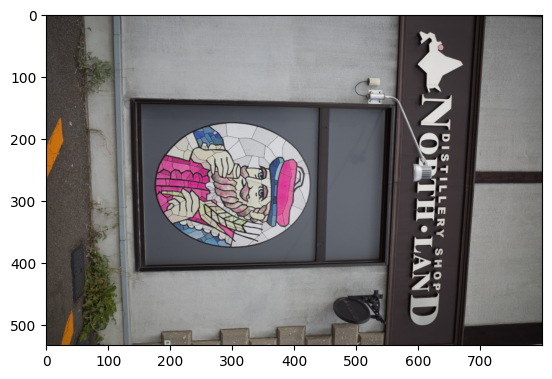

In [48]:
import cv2
import matplotlib.pyplot as plt

# RGBA画像の読み込み
image = cv2.imread('nikka.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 画像を回転
after_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# 画像の表示
print(after_image.shape)
plt.imshow(after_image)
plt.show()

(533, 800, 3)


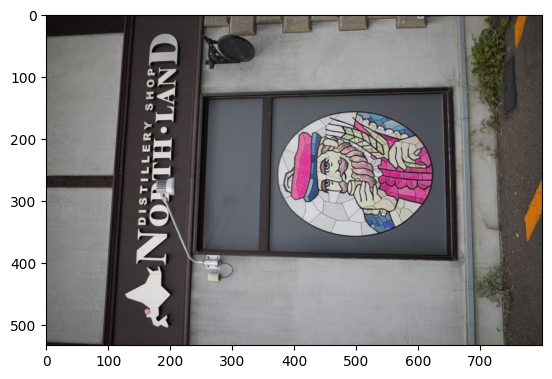

In [49]:
import cv2
import matplotlib.pyplot as plt

# RGBA画像の読み込み
image = cv2.imread('nikka.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 画像を回転
after_image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)

# 画像の表示
print(after_image.shape)
plt.imshow(after_image)
plt.show()

### 演習
A. 以下の画像(wb-ex.jpg)に対して，各処理を行いなさい
- 3×3の十字のカーネルを使用すること

<img src="fig/wb-ex.jpg" width="50%">

1. 2回の膨張処理を行いなさい
2. 2回の収縮処理を行いなさい
3. モルフォロジー勾配（2回）を行い，白黒反転（白を黒，黒を白に変換する）を行いなさい
4. トリミングを行い『平』の文字だけを表示する画像を作成しなさい

B. 以下の画像(wb-ex_black_noise.jpg)に対して，ノイズを除去しなさい
- 3×3の十字のカーネルを使用すること

<img src="fig/wb-ex_black_noise.jpg" width="50%">

C. 以下の画像(wb-ex_white_noise.jpg)に対して，ノイズを除去しなさい
- 3×3の十字のカーネルを使用すること

<img src="fig/wb-ex_white_noise.jpg" width="50%">